In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import time
import random
from collections import deque
from tqdm import tqdm
import copy
import pandas as pd

In [2]:
P_0_matrix=np.array([[1.0,0,0,0,0,0,0,0],
                   [1.0,0,0,0,0,0,0,0],
                   [0,0.48,0.52,0,0,0,0,0],
                   [0,0,0.47,0.53,0,0,0,0],
                   [0,0,0,0,0.9,0.1,0,0],
                   [0,0,0,0,0,0.9,0.1,0],
                   [0,0,0,0,0,0,0.9,0.1],
                   [0.1,0,0,0,0,0,0,0.9]])

P_0_matrix


array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.48, 0.52, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.47, 0.53, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.9 , 0.1 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.9 , 0.1 , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.9 , 0.1 ],
       [0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.9 ]])

In [3]:
P_1_matrix=np.array([[0.9,0.1,0,0,0,0,0,0],
                   [0,0.9,0.1,0,0,0,0,0],
                   [0,0,0.9,0.1,0,0,0,0],
                   [0,0,0,0.9,0.1,0,0,0],
                   [0,0,0,0.46,0.54,0,0,0],
                   [0,0,0,0,0.45,0.55,0,0],
                   [0,0,0,0,0,0.44,0.56,0],
                   [0,0,0,0,0,0,0.43,0.57]])

P_1_matrix

array([[0.9 , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.9 , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.9 , 0.1 , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.9 , 0.1 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.46, 0.54, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.45, 0.55, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.44, 0.56, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.43, 0.57]])

In [4]:
action_space=[0,1]
state_space=[0,1,2,3,4,5,6,7]
reward_matrix=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0.1,0]]
N=100
M=50
epsilon=0.1
subsidy=0
arm_indexes=[i for i in range(N)]
gamma=0.99


In [5]:

def step(state,state_space,action,P_0_matrix,P_1_matrix,reward_matrix):
  new_state=state
  if(action==1):
    new_state=np.random.choice(state_space,replace=True,p=P_1_matrix[state])
    reward=reward_matrix[state][1]
  else:
    new_state=np.random.choice(state_space,replace=True,p=P_0_matrix[state])
    reward=reward_matrix[state][0]
  return [new_state,reward]

In [6]:


def act(Q_values,epsilon,state):
  decision=np.random.binomial(n=1,p=epsilon,size=1)
  if decision==1:
    action=random.choice([0,1])
  else:
    action=np.argmax(Q_values[state])
  return action

In [7]:


current_state=[random.choice([0,1,2,3,4,5,6,7]) for _ in range(N)]


In [8]:
Q=copy.deepcopy(reward_matrix)

In [9]:
rewards=[]
subsidies=[]
action_sums=[]
betas=[]
alphas=[]
epsilon=0.1

subsidy=0

In [10]:
for i in range(1,500001):
  action_sum=0
  reward_sum=0
  T=False
  alpha=1/np.ceil(1+i/500)
  # if(i<50000):
  #   beta=0
  # else:
  if i%100==0:
    beta=1/(1+np.ceil((i)*np.log(i)/500))
  else:
    beta=0
  temp=0
  reward=0
  new_state=0
  epsilon=0.1

  if i%10000==0:
     print(i)
  # print(indices_to_pull)
  # if(i==50000):
  #   print(Q_values)
  #   T=True
  for index in arm_indexes:
      # temp=copy.deepcopy(Q_values)

        # print(i)
        # print(alpha)
        # print(beta)

        action=act(Q,epsilon,current_state[index])

        # print(current_state)
        # print(action)

        action_sum+=action
        x=step(current_state[index],state_space,action,P_0_matrix,P_1_matrix,reward_matrix)
        new_state=x[0]
        # print(new_state)
        reward=x[1]
        # print(reward)
        if action==1:
          Q[current_state[index]][action]=(1-alpha)*(Q[current_state[index]][action])+alpha*(reward+max(Q[new_state])-(np.array(Q).sum())/16)
        else:
          Q[current_state[index]][action]=(1-alpha)*(Q[current_state[index]][action])+alpha*(reward+subsidy+max(Q[new_state])-(np.array(Q).sum())/16)
        current_state[index]=new_state
        reward_sum+=reward

        #print(x)

        # print(Q_values)
        # whittle_indexes[index][current_state[index]]+=beta*temp

        # print(whittle_indexes)
        # print("--")


        #print(x)
  # print(i)
  # print(whittle_indexes)
  # print(current_state[index])
  # print(Q_values[index][current_state[index]][1])
  # print(Q_values[index][current_state[index]][0])
  # print((Q_values[index][current_state[index]][1]-Q_values[index][current_state[index]][0]))
  # print('----')
  # whittle_indexes=whittle_indexes_update(whittle_indexes,Q_values,beta,arm_indexes,state_space,T)
  # print(w5)
  # clear_output()



  # whittle_indexes_over_time.append(copy.deepcopy(whittle_indexes))
  # epsilon=epsilon*gamma
  subsidy+=beta*(action_sum-M)
  subsidies.append(subsidy)
  if epsilon<=0.1:
    epsilon=0.1
  rewards.append(reward_sum)
  action_sums.append(action_sum)
  betas.append(beta)
  alphas.append(alpha)
  clear_output(wait=True)








500000


In [11]:
Q


[[-0.5916963994129324, -0.5865568911737938],
 [-0.5861081166826585, -0.3495442377773722],
 [-0.22783461248362596, -0.11636531031601559],
 [0.008908869983807877, 0.10272890935766708],
 [0.33759205777387175, 0.2185984279107105],
 [0.3528731617226751, 0.3299312011472377],
 [0.3767473753295308, 0.3388160700522231],
 [0.39617756803467075, 0.35163000702180186]]

Text(0.5, 1.0, 'Subsidy vs Steps for Non Indexable Example')

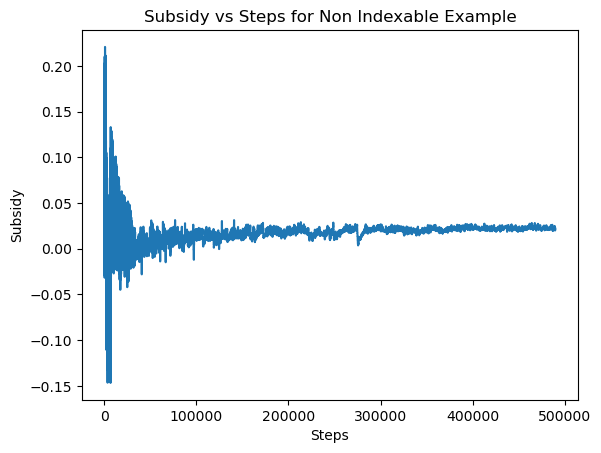

In [12]:
plt.plot(subsidies[10000:])
plt.xlabel('Steps')
plt.ylabel('Subsidy')
plt.title('Subsidy vs Steps for Non Indexable Example')

In [13]:
for x in Q:
  print(x)
  print(x[1]-x[0])

[-0.5916963994129324, -0.5865568911737938]
0.005139508239138557
[-0.5861081166826585, -0.3495442377773722]
0.2365638789052863
[-0.22783461248362596, -0.11636531031601559]
0.11146930216761038
[0.008908869983807877, 0.10272890935766708]
0.0938200393738592
[0.33759205777387175, 0.2185984279107105]
-0.11899362986316125
[0.3528731617226751, 0.3299312011472377]
-0.022941960575437403
[0.3767473753295308, 0.3388160700522231]
-0.0379313052773077
[0.39617756803467075, 0.35163000702180186]
-0.044547561012868886


In [14]:
df=pd.DataFrame(rewards)


Text(0.5, 1.0, ' Moving Average of reward for Non Indexable Example ')

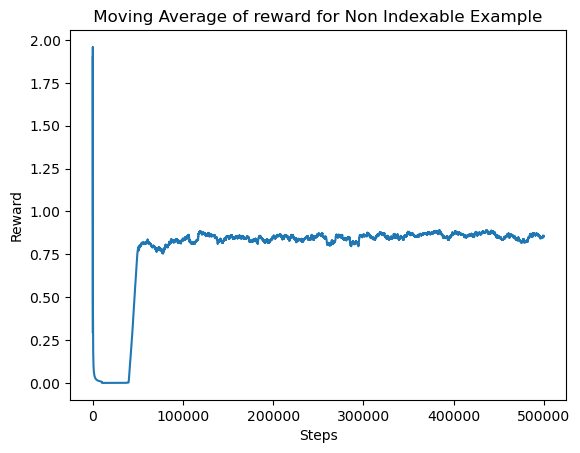

In [15]:
plt.plot(df[0].rolling(10000,min_periods=1).mean())
# plt.axhline(y = 14, color = 'r', linestyle = '-')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title(' Moving Average of reward for Non Indexable Example ')


Text(0.5, 1.0, ' Moving Average of number of arms activated for Non Indexable Example ')

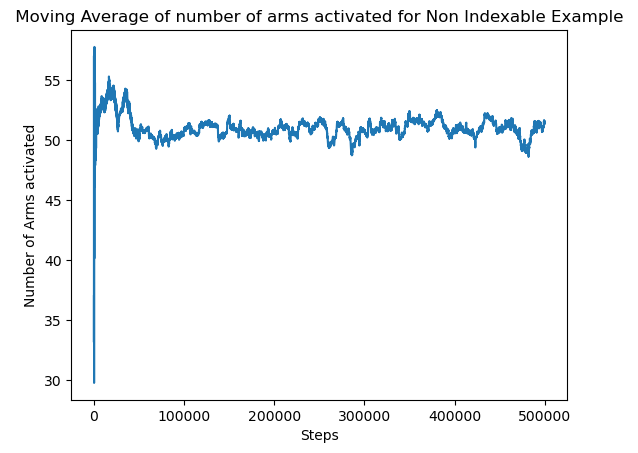

In [16]:
df['action_sums']=action_sums
plt.plot(df['action_sums'].rolling(10000,min_periods=1).mean())
plt.xlabel('Steps')
plt.ylabel('Number of Arms activated')

plt.title(' Moving Average of number of arms activated for Non Indexable Example ')


In [17]:
#using learnt indices
# current_state=[random.choice([0,1,2,3,4,5,6,7]) for _ in range(N)]
current_state=[1 for _ in range(int(N/3))]
current_state.extend([2 for _ in range(int(2*N/3)+1)])

reward_sums_alt_index=[]
indices_to_pull_temp=[]
indices_to_pull=[]
alternative_indexes=[0 for _ in range(N)]
arms_pulled=[]
states_7=[]
states_0=[]
states_1=[]
states_2=[]
states_3=[]
states_4=[]
states_5=[]
states_6=[]
for i in range(1,10001):
  indices_to_pull_temp=[]
  indices_to_pull=[]
  reward_sum_alt_index=0
  reward_sum_whittle_index=0
  for index in arm_indexes:

    # alternative_indexes[index]=Q_values[index][current_state[index]][1]

    alternative_indexes[index]=Q[current_state[index]][1]-Q[current_state[index]][0]

  # print(alternative_indexes)
  indices_to_pull_temp = sorted(range(len(alternative_indexes)), key = lambda j: alternative_indexes[j])[-M:]
  # for x in indices_to_pull_temp:
  #   if alternative_indexes[x]>0:
  #     indices_to_pull.append(x)
  indices_to_pull=indices_to_pull_temp
  arms_pulled.append(len(indices_to_pull))
  states_7_val=0
  states_0_val=0
  states_1_val=0
  states_2_val=0
  states_3_val=0
  states_4_val=0
  states_5_val=0
  states_6_val=0
  for x in arm_indexes:
    if current_state[x]==7:
      states_7_val+=1
    if current_state[x]==6:
      states_6_val+=1
    if current_state[x]==5:
      states_5_val+=1
    if current_state[x]==4:
      states_4_val+=1
    if current_state[x]==3:
      states_3_val+=1
    if current_state[x]==2:
      states_2_val+=1
    if current_state[x]==1:
      states_1_val+=1
    if current_state[x]==0:
      states_0_val+=1
  states_7.append(states_7_val)
  states_0.append(states_0_val)
  states_1.append(states_1_val)
  states_1.append(states_2_val)
  states_3.append(states_3_val)
  states_4.append(states_4_val)
  states_5.append(states_5_val)
  states_6.append(states_6_val)

  # for x in indices_to_pull:
  #   print(current_state[x])
  # print('=================')
  # print(len(indices_to_pull))
  # temp=[]
  # temp2=[]
  # for x in indices_to_pull:
  #   temp.append(current_state[x])
  #   temp2.append(alternative_indexes[x])
  # print(temp)
  # print(temp2)
  for index in arm_indexes:
    if index in indices_to_pull:
      x=step(current_state[index],state_space,1,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_alt_index+=reward
    else:
      x=step(current_state[index],state_space,0,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_alt_index+=reward
  reward_sums_alt_index.append(reward_sum_alt_index)

Text(0.5, 1.0, ' Moving Average of reward for Non Whittle Indexable Example ')

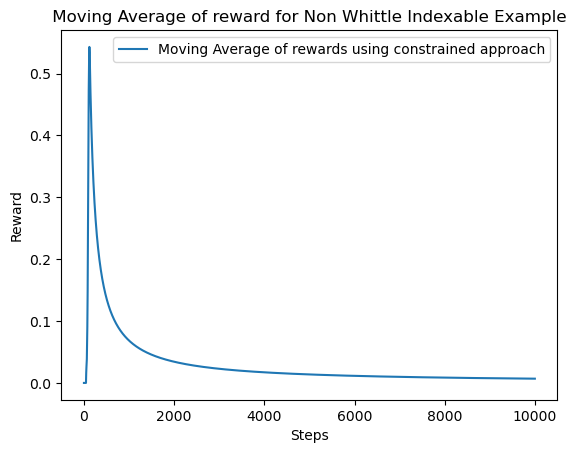

In [21]:
df_new=pd.DataFrame()

# df_new['reward_whittle']=reward_sums_whittle_index

df_new['reward_alternate']=reward_sums_alt_index

# plt.plot(df_new['original'][:50000].rolling(10000,min_periods=1).mean(),label='Moving Average of rewards using original approach')
plt.plot(df_new['reward_alternate'][:50000].rolling(10000,min_periods=1).mean(),label='Moving Average of rewards using constrained approach')
# plt.plot(df_new['reward_alternate'])
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.title(' Moving Average of reward for Non Whittle Indexable Example ')

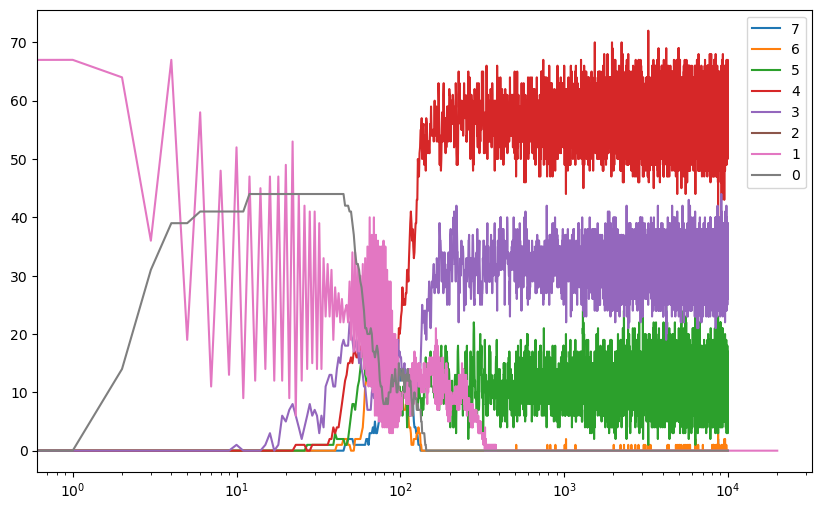

In [19]:
plt.figure(figsize=(10,6))
plt.xscale("log")
plt.plot(states_7,label='7')
plt.plot(states_6,label='6')
plt.plot(states_5,label='5')
plt.plot(states_4,label='4')
plt.plot(states_3,label='3')
plt.plot(states_2,label='2')
plt.plot(states_1,label='1')
plt.plot(states_0,label='0')
plt.legend()


Text(0.5, 1.0, 'Moving average of Number of arms pulled')

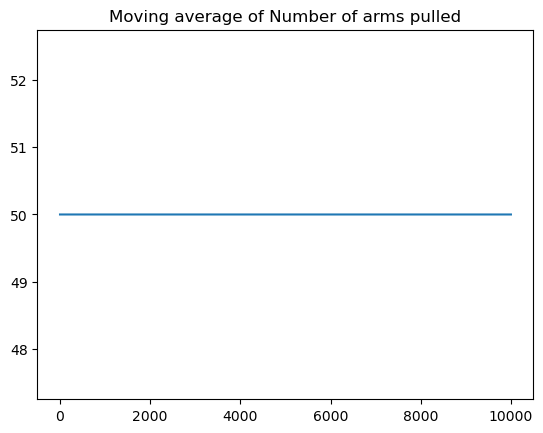

In [20]:
df_temp=pd.DataFrame()
df_temp['x']=arms_pulled
plt.plot(df_temp['x'].rolling(1000,min_periods=1).mean())
plt.title('Moving average of Number of arms pulled')
